# With Preprocessing

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/CSE445/Dataset/After_preprocessing_Maternal-Health-Risk-Data-Set.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,BP
0,25,130,80,15.0,98.0,86,3.0,3.0
1,35,140,90,13.0,98.0,70,3.0,3.0
2,29,90,70,8.0,100.0,80,3.0,2.0
3,30,140,85,7.0,98.0,70,3.0,3.0
4,35,120,60,6.1,98.0,76,1.0,2.0


In [4]:
# Run commands for beautifying figures
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [5]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [6]:
X = df.drop(columns = 'RiskLevel')
y = df['RiskLevel']

In [7]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
y.value_counts()

3.0    406
1.0    406
2.0    406
Name: RiskLevel, dtype: int64

In [8]:
X.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,BP
0,25,130,80,15.0,98.0,86,3.0
1,35,140,90,13.0,98.0,70,3.0
2,29,90,70,8.0,100.0,80,2.0
3,30,140,85,7.0,98.0,70,3.0
4,35,120,60,6.1,98.0,76,2.0


In [9]:
y.head()

0    3.0
1    3.0
2    3.0
3    3.0
4    1.0
Name: RiskLevel, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(974, 7) (974,) (244, 7) (244,)


In [11]:
X_train.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,BP
432,40,140,100,13.00000,101.000000,66,3.000000
277,60,120,85,15.00000,98.000000,60,2.000000
721,28,85,60,9.00000,101.000000,86,1.000000
1062,31,110,90,6.80624,99.875197,70,2.062402
678,23,140,80,7.01000,98.000000,70,3.000000


In [12]:
y_train

432     3.0
277     3.0
721     2.0
1062    2.0
678     3.0
       ... 
1044    2.0
1095    3.0
1130    3.0
860     2.0
1126    3.0
Name: RiskLevel, Length: 974, dtype: float64

In [13]:
X_train.columns.values

array(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'BP'], dtype=object)

In [14]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training set and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaler transformation to the test set
X_test_scaled = scaler.transform(X_test)

# Check the shapes of the scaled datasets
print(X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape)

(974, 7) (974,) (244, 7) (244,)


In [15]:
from sklearn.impute import SimpleImputer  # Import SimpleImputer
imp = SimpleImputer(strategy = 'median')
X_train_scaled = imp.fit_transform(X_train_scaled)
X_test_scaled = imp.transform(X_test_scaled)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors = 25)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=25)

In [17]:
y_pred = knn.predict(X_test_scaled)

In [18]:
X_test_scaled

array([[ 1.350455  ,  0.31375165,  0.89935134, ..., -0.5112453 ,
         0.27014871, -0.38255312],
       [-0.70649048,  0.31375165,  0.18415849, ..., -0.5112453 ,
         0.15043768,  1.08587969],
       [-0.04532943,  0.31375165,  0.18415849, ..., -0.5112453 ,
        -0.56782849,  1.08587969],
       ...,
       [-1.14726451, -2.08007791, -2.03293935, ..., -0.5112453 ,
         0.27014871, -1.85098594],
       [-1.00033983, -1.59043096, -1.24622722, ...,  2.36364618,
         1.34754796, -1.85098594],
       [-0.11879177, -1.31840487, -0.53103436, ..., -0.5112453 ,
         0.62928179, -0.38255312]])

In [19]:
pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

,y_test,y_pred
541,1.0,1.0
259,1.0,2.0
43,1.0,1.0
1008,3.0,3.0
584,3.0,3.0
...,...,...
420,2.0,1.0
243,2.0,2.0
59,1.0,1.0
1073,2.0,2.0


In [20]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print('Test Accuracy ', accuracy_score(y_test, y_pred ))

Test Accuracy  0.6885245901639344


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.64      0.77      0.70        87
         2.0       0.58      0.52      0.55        81
         3.0       0.89      0.78      0.83        76

    accuracy                           0.69       244
   macro avg       0.70      0.69      0.69       244
weighted avg       0.70      0.69      0.69       244



<Axes: >

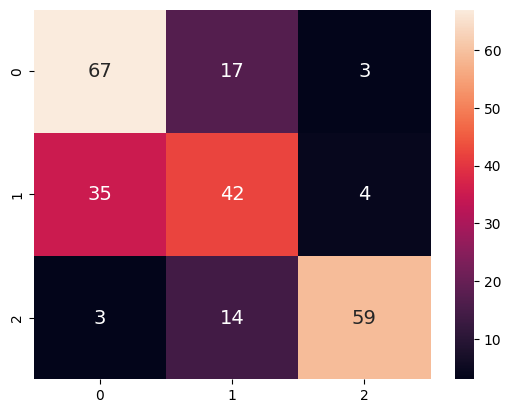

In [22]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [23]:
print('Train Accuracy ', accuracy_score(y_train, knn.predict(X_train_scaled) ))

Train Accuracy  0.6981519507186859


In [24]:
print(classification_report(y_train, knn.predict(X_train_scaled)))

              precision    recall  f1-score   support

         1.0       0.66      0.77      0.71       319
         2.0       0.61      0.52      0.56       325
         3.0       0.82      0.80      0.81       330

    accuracy                           0.70       974
   macro avg       0.70      0.70      0.69       974
weighted avg       0.70      0.70      0.69       974



In [25]:
pip install scikit-plot

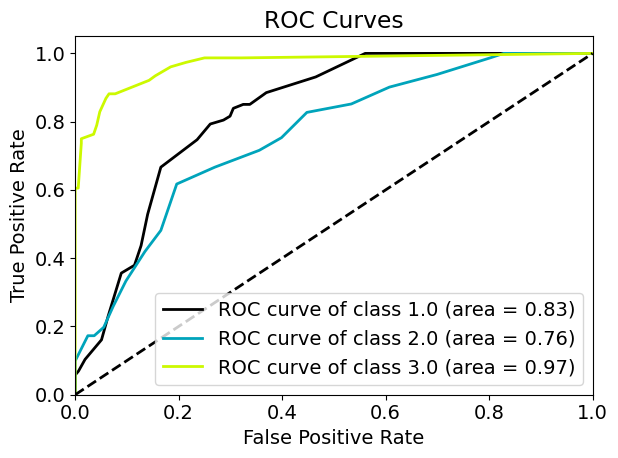

In [26]:
import scikitplot as skplt
y_probas = knn.predict_proba(X_test_scaled)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro = False, plot_macro = False)
save_fig('ROC Curve-KNN')
plt.show();

Experimenting with different values of K

In [27]:
k = range(10, 30)
k

range(10, 30)

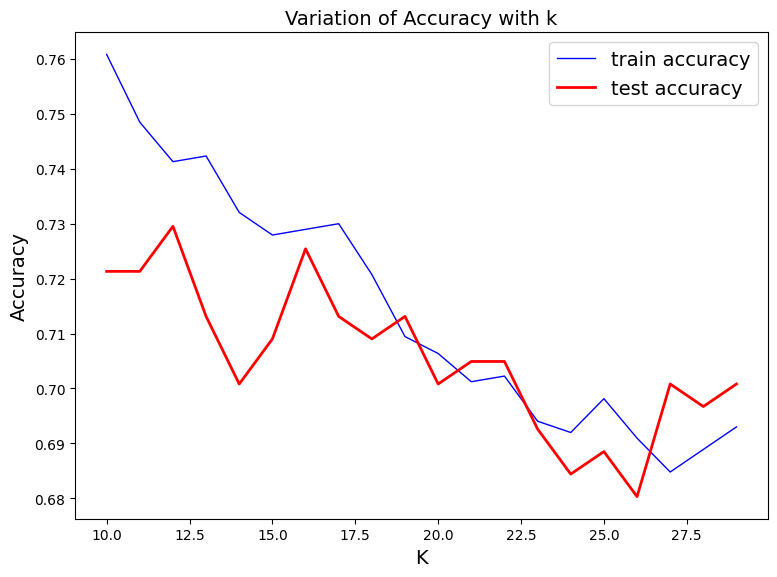

In [28]:
k = range(10, 30)  # Define `k` as a range of values
train_acc = []
test_acc = []
neighbors = []

for i in k:
    neighbors.append(i)
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train_scaled, y_train)
    train_acc.append(accuracy_score(y_train, model.predict(X_train_scaled)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test_scaled)))

plt.figure(figsize=(8, 6))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with k')
plt.plot(neighbors, train_acc, color='blue', linewidth=1, label='train accuracy')
plt.plot(neighbors, test_acc, color='red', linewidth=2, label='test accuracy')
plt.legend()
save_fig('Accuracy against k')
plt.show()


In [29]:
train_acc

[0.7607802874743327,
 0.7484599589322382,
 0.7412731006160165,
 0.742299794661191,
 0.7320328542094456,
 0.7279260780287474,
 0.728952772073922,
 0.7299794661190965,
 0.7207392197125256,
 0.7094455852156057,
 0.7063655030800822,
 0.7012320328542094,
 0.702258726899384,
 0.6940451745379876,
 0.6919917864476386,
 0.6981519507186859,
 0.6909650924024641,
 0.6848049281314168,
 0.688911704312115,
 0.6930184804928131]

In [30]:
pd.DataFrame({'K': neighbors, 'Train Acc': train_acc, 'Test Acc': test_acc})

,K,Train Acc,Test Acc
0,10,0.760780,0.721311
1,11,0.748460,0.721311
2,12,0.741273,0.729508
3,13,0.742300,0.713115
4,14,0.732033,0.700820
5,15,0.727926,0.709016
6,16,0.728953,0.725410
7,17,0.729979,0.713115
8,18,0.720739,0.709016
9,19,0.709446,0.713115


In [31]:
k = 28

knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)
print('Train Accuracy', accuracy_score(y_train, knn.predict(X_train_scaled)))
print('Test Accuracy', accuracy_score(y_test, pred))

print(classification_report(y_test, pred))

Train Accuracy 0.688911704312115
Test Accuracy 0.6967213114754098
              precision    recall  f1-score   support

         1.0       0.66      0.76      0.71        87
         2.0       0.58      0.56      0.57        81
         3.0       0.88      0.78      0.83        76

    accuracy                           0.70       244
   macro avg       0.71      0.70      0.70       244
weighted avg       0.70      0.70      0.70       244



# Without Preprocessing

In [32]:
df_before = pd.read_csv('/content/drive/MyDrive/CSE445/Dataset/Maternal-Health-Risk-Data-Set.csv')
df_before.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [33]:
# Define mapping dictionary
risk_mapping = {'high risk': 3.0, 'mid risk': 2.0, 'low risk': 1.0}

# Convert string column to float using mapping dictionary
df_before['RiskLevel'] = df_before['RiskLevel'].map(risk_mapping)

In [34]:
Before_Feature = df_before.drop(columns = 'RiskLevel')
Before_Target = df_before['RiskLevel']

In [35]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
Before_Feature, Before_Target = oversample.fit_resample(Before_Feature, Before_Target)
Before_Target.value_counts()

3.0    406
1.0    406
2.0    406
Name: RiskLevel, dtype: int64

In [36]:
Before_Feature

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.000000,98.000000,86
1,35,140,90,13.000000,98.000000,70
2,29,90,70,8.000000,100.000000,80
3,30,140,85,7.000000,98.000000,70
4,35,120,60,6.100000,98.000000,76
...,...,...,...,...,...,...
1213,35,140,81,13.000000,98.000000,70
1214,30,83,60,9.011457,101.337152,86
1215,25,140,100,9.197225,98.316396,80
1216,30,83,60,9.242820,101.414273,86


In [37]:
Before_Target.to_frame()

,RiskLevel
0,3.0
1,3.0
2,3.0
3,3.0
4,1.0
...,...
1213,3.0
1214,3.0
1215,3.0
1216,3.0


In [38]:
from sklearn.model_selection import train_test_split
Before_X_train, Before_X_test, Before_y_train, Before_y_test = train_test_split(Before_Feature, Before_Target, test_size = 0.2, random_state = 42)
print(Before_X_train.shape, Before_y_train.shape, Before_X_test.shape, Before_y_test.shape)

(974, 6) (974,) (244, 6) (244,)


In [39]:
Before_X_train

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
432,40,140,100,13.000000,101.0,66
277,60,120,85,15.000000,98.0,60
721,28,85,60,9.000000,101.0,86
1062,29,90,68,7.066512,98.0,79
678,23,140,80,7.010000,98.0,70
...,...,...,...,...,...,...
1044,21,120,80,7.275644,98.0,76
1095,40,160,100,19.000000,98.0,77
1130,32,140,90,18.000000,98.0,88
860,17,90,63,6.900000,101.0,70


In [40]:
Before_y_train

432     3.0
277     3.0
721     2.0
1062    2.0
678     3.0
       ... 
1044    2.0
1095    3.0
1130    3.0
860     2.0
1126    3.0
Name: RiskLevel, Length: 974, dtype: float64

In [41]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training set and transform it
Before_X_train_scaled = scaler.fit_transform(Before_X_train)

# Apply the same scaler transformation to the test set
Before_X_test_scaled = scaler.transform(Before_X_test)

# Check the shapes of the scaled datasets
print(Before_X_train_scaled.shape, y_train.shape, Before_X_test_scaled.shape, y_test.shape)

(974, 6) (974,) (244, 6) (244,)


In [42]:
imp = SimpleImputer(strategy = 'median')
Before_X_train_scaled = imp.fit_transform(Before_X_train_scaled)
Before_X_test_scaled = imp.transform(Before_X_test_scaled)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
Before_knn =KNeighborsClassifier(n_neighbors = 25)
Before_knn.fit(Before_X_train_scaled, Before_y_train)

KNeighborsClassifier(n_neighbors=25)

In [44]:
Before_y_pred = Before_knn.predict(Before_X_test_scaled)

In [45]:
Before_X_test_scaled

array([[ 1.31906022,  0.30183587,  0.88996818, -0.46034849, -0.49919496,
         0.29375032],
       [-0.70578557,  0.30183587,  0.17699811, -0.62829847, -0.49919496,
         0.17398774],
       [-0.05494228,  0.30183587,  0.17699811, -0.85223178, -0.49919496,
        -0.54458777],
       ...,
       [-1.1396811 , -2.08038843, -2.03320909, -0.76825679, -0.49919496,
         0.29375032],
       [-0.1272582 ,  0.84325048, -0.53597195, -0.85223178, -0.49919496,
         0.41351291],
       [-0.1272582 , -1.32240797, -0.53597195, -0.6842818 , -0.49919496,
         0.65303808]])

In [46]:
pd.DataFrame({'Before_y_test': Before_y_test, 'Before_y_pred': Before_y_pred})

,Before_y_test,Before_y_pred
541,1.0,1.0
259,1.0,2.0
43,1.0,1.0
1008,3.0,3.0
584,3.0,3.0
...,...,...
420,2.0,1.0
243,2.0,2.0
59,1.0,1.0
1073,2.0,2.0


In [47]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print('Test Accuracy ', accuracy_score(Before_y_test, Before_y_pred ))

Test Accuracy  0.6721311475409836


In [48]:
print(classification_report(Before_y_test, Before_y_pred))

              precision    recall  f1-score   support

         1.0       0.63      0.74      0.68        87
         2.0       0.54      0.53      0.53        81
         3.0       0.92      0.75      0.83        76

    accuracy                           0.67       244
   macro avg       0.69      0.67      0.68       244
weighted avg       0.69      0.67      0.68       244



<Axes: >

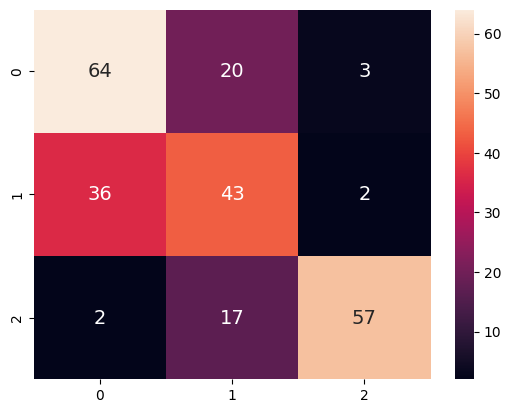

In [49]:
cm = confusion_matrix(Before_y_test, Before_y_pred)
sns.heatmap(cm, annot = True)

In [50]:
print('Train Accuracy ', accuracy_score(Before_y_train, Before_knn.predict(Before_X_train_scaled) ))

Train Accuracy  0.7073921971252567


In [51]:
print(classification_report(y_train, Before_knn.predict(Before_X_train_scaled)))

              precision    recall  f1-score   support

         1.0       0.68      0.75      0.71       319
         2.0       0.60      0.58      0.59       325
         3.0       0.85      0.79      0.82       330

    accuracy                           0.71       974
   macro avg       0.71      0.71      0.71       974
weighted avg       0.71      0.71      0.71       974



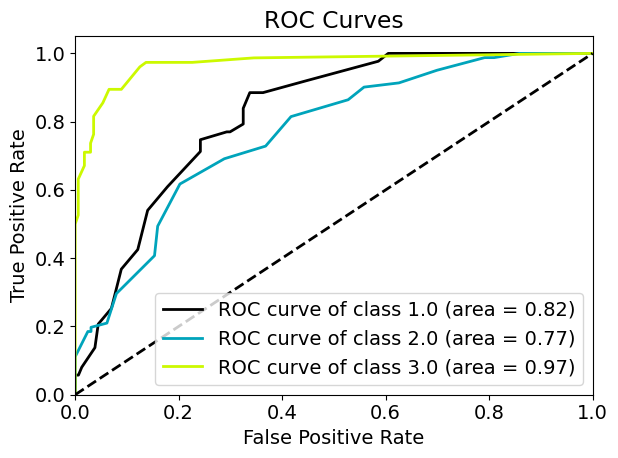

In [52]:
Before_y_probas = Before_knn.predict_proba(Before_X_test_scaled)
skplt.metrics.plot_roc(Before_y_test, Before_y_probas, plot_micro = False, plot_macro = False)
save_fig('ROC Curve-KNN')
plt.show();

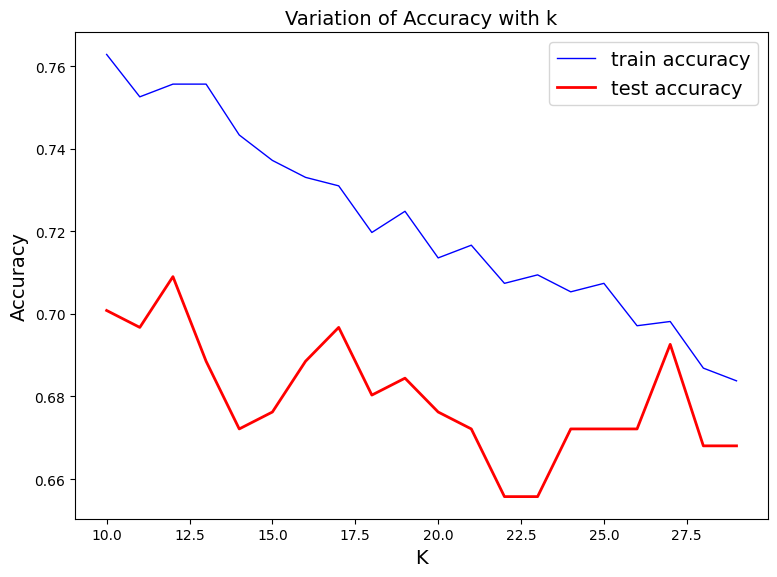

In [53]:
k = range(10, 30)  # Define `k` as a range of values
train_acc = []
test_acc = []
neighbors = []

for i in k:
    neighbors.append(i)
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(Before_X_train_scaled, Before_y_train)
    train_acc.append(accuracy_score(Before_y_train, model.predict(Before_X_train_scaled)))
    test_acc.append(accuracy_score(Before_y_test, model.predict(Before_X_test_scaled)))

plt.figure(figsize=(8, 6))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with k')
plt.plot(neighbors, train_acc, color='blue', linewidth=1, label='train accuracy')
plt.plot(neighbors, test_acc, color='red', linewidth=2, label='test accuracy')
plt.legend()
save_fig('Accuracy against k')
plt.show()


In [54]:
pd.DataFrame({'K': neighbors, 'Train Acc': train_acc, 'Test Acc': test_acc})

,K,Train Acc,Test Acc
0,10,0.762834,0.700820
1,11,0.752567,0.696721
2,12,0.755647,0.709016
3,13,0.755647,0.688525
4,14,0.743326,0.672131
5,15,0.737166,0.676230
6,16,0.733060,0.688525
7,17,0.731006,0.696721
8,18,0.719713,0.680328
9,19,0.724846,0.684426


In [55]:
k = 28

knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)
print('Train Accuracy', accuracy_score(y_train, knn.predict(X_train_scaled)))
print('Test Accuracy', accuracy_score(y_test, pred))

print(classification_report(y_test, pred))

Train Accuracy 0.688911704312115
Test Accuracy 0.6967213114754098
              precision    recall  f1-score   support

         1.0       0.66      0.76      0.71        87
         2.0       0.58      0.56      0.57        81
         3.0       0.88      0.78      0.83        76

    accuracy                           0.70       244
   macro avg       0.71      0.70      0.70       244
weighted avg       0.70      0.70      0.70       244

